In [25]:
import pywt #小波变换要引入这个包
def Wavelet_Transform(data,threshold):
    w = pywt.Wavelet('db8')  # 选用Daubechies8小波
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    coeffs = pywt.wavedec(data, 'db8', level=maxlev)  # 将信号进行小波分解
    for i in range(0, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))  # 将噪声滤波  小于value的值设置为0，大于value的减去value作为新的值
    result = pywt.waverec(coeffs, 'db8')#将信号进行小波重构
    return result

4834
4834
4834


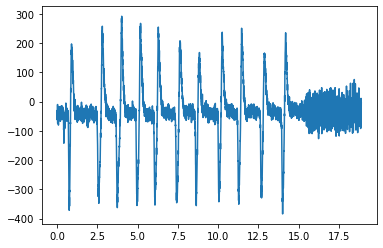

In [53]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Study\PJ\NetHack\our code\eeg_boiler_blink_blink.csv')
# df = pd.read_csv(r'C:\Study\PJ\NetHack\our code\eeg_boiler_close_open.csv')

c1_list=[]
t_list=[]
df.columns = ['c1','c2','c3','c4']


for i in range(len(df)-1):
# for i in range(int(1.5*256),to_even(10*256)):
    c1_list.append(df.loc[i,'c1'])
    t_list.append(i*(1/256))
    
print(len(c1_list))
print(len(t_list))
c1_list=Wavelet_Transform(c1_list,0)
print(len(c1_list))
plt.plot(t_list,c1_list)
plt.show()


In [29]:
def to_even(a):
    return int(a//2*2)

In [55]:
from brainflow.data_filter import DataFilter, DetrendOperations, FilterTypes
def fil(data,sampling_rate):
    DataFilter.perform_bandpass(
        data,
        sampling_rate,
        51.0,
        100.0,
        2,
        FilterTypes.BUTTERWORTH.value,
        0,
    )
    DataFilter.perform_bandpass(
        data,
        sampling_rate,
        51.0,
        100.0,
        2,
        FilterTypes.BUTTERWORTH.value,
        0,
    )
    DataFilter.perform_bandstop(
        data,
        sampling_rate,
        50.0,
        4.0,
        2,
        FilterTypes.BUTTERWORTH.value,
        0,
    )
    DataFilter.perform_bandstop(
        data,
        sampling_rate,
        60.0,
        4.0,
        2,
        FilterTypes.BUTTERWORTH.value,
        0,
    )
    DataFilter.perform_bandpass(
        data,
        sampling_rate,
        51.0,
        100.0,
        2,
        FilterTypes.BUTTERWORTH.value,
        0,
    )
    DataFilter.perform_bandpass(
        data,
        sampling_rate,
        51.0,
        100.0,
        2,
        FilterTypes.BUTTERWORTH.value,
        0,
    )
    DataFilter.perform_bandstop(
        data,
        sampling_rate,
        50.0,
        4.0,
        2,
        FilterTypes.BUTTERWORTH.value,
        0,
    )
    DataFilter.perform_bandstop(
        data,
        sampling_rate,
        60.0,
        4.0,
        2,
        FilterTypes.BUTTERWORTH.value,
        0,
    )
    return data